                            COVID 19 DATA ANALYSIS

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mfp
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm

import chart_studio.plotly as yp
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
cf.go_offline()


import requests #Getting the data from the web
from bs4 import BeautifulSoup # For web scraping, Manipulating the URL data
import json
from pandas import DataFrame as df

                    1. Grab Data From URL(Data Collection)
                                 Web-Scraping

Basic Covid Data

Cleaning up with Regex

                        2. Working with CSV Data

<Axes: title={'center': 'India Total Cases'}, xlabel='date'>

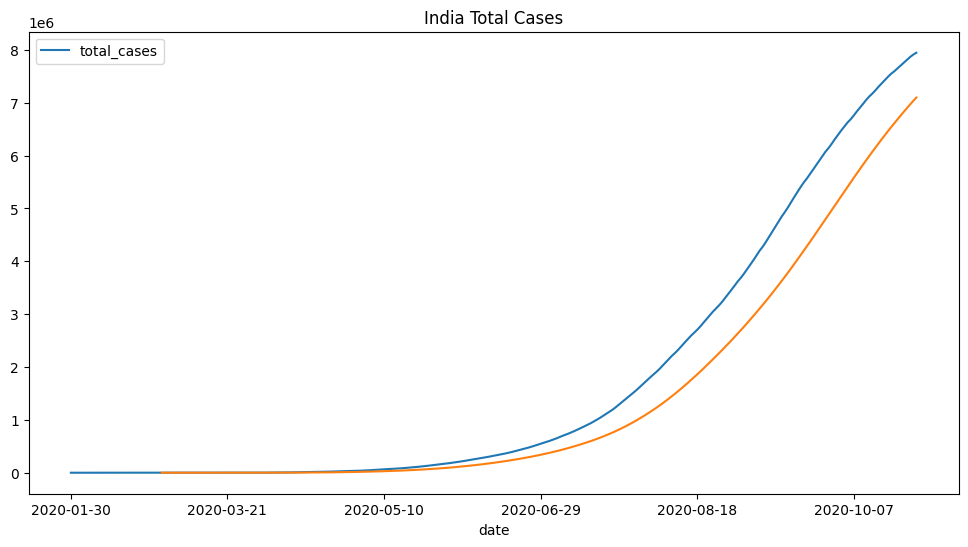

In [44]:
owid_df = pd.read_csv('owid-covid-data.csv')
owid_df.columns
country_df = owid_df['location'].unique()


indexer = owid_df[owid_df['location'] == 'India'].index
in_tc = owid_df.loc[indexer, 'date':'total_cases']
in_tc = in_tc.dropna()
in_tc.set_index('date', inplace=True)
in_tc.plot(figsize=(12, 6), title='India Total Cases')
in_tc.rolling(window=30).mean()['total_cases'].plot()



Do Lockdowns work?

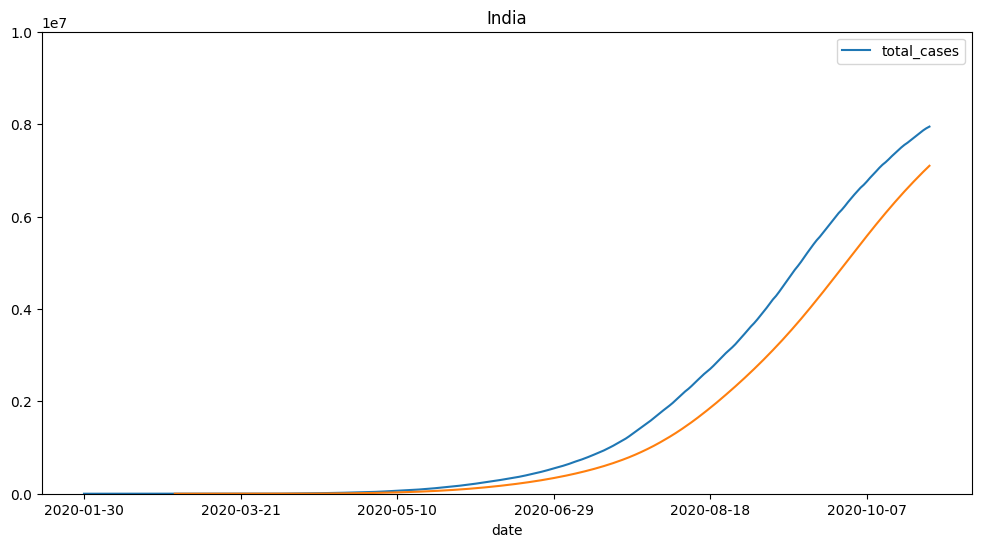

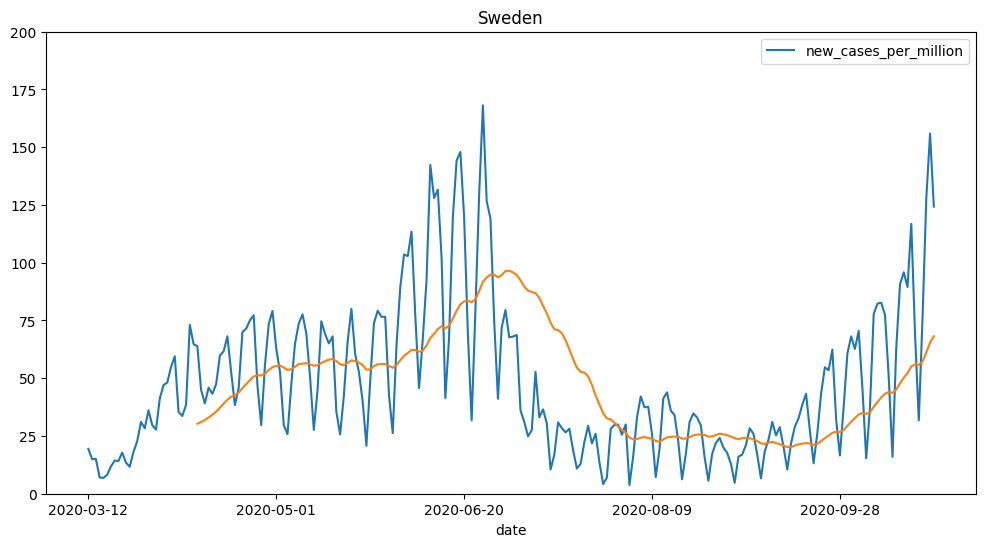

In [45]:
def plot_covid_data(country, col, plot_ma=False, y_max=200.00):
    # Get indexes for location rows equal to country name
    indexer = owid_df[owid_df['location']==country].index
    # Get dataframe location and column data for country name
    country_df = owid_df.loc[indexer, 'date':col]
    # Delete NaN values
    country_df = country_df.dropna()
    # Set date as index
    country_df.set_index('date', inplace=True)
    # Remove all columns except for the one we want
    country_df.drop(columns=country_df.columns.difference([col]), inplace=True)
    country_df.plot(figsize=(12, 6), ylim=[0, y_max], title=country)

    if plot_ma:
        # Plot moving average for 30 days
        country_df.rolling(window=30).mean()[col].plot()
    # print(country_df.columns)


plot_covid_data('India', 'total_cases', plot_ma=True, y_max=10000000)
plot_covid_data('Sweden', 'new_cases_per_million', plot_ma=True)
# plot_covid_data('India', 'total_deaths', plot_ma=True, y_max=50000)


    
    


How Does Median Age Effect Death Rate?

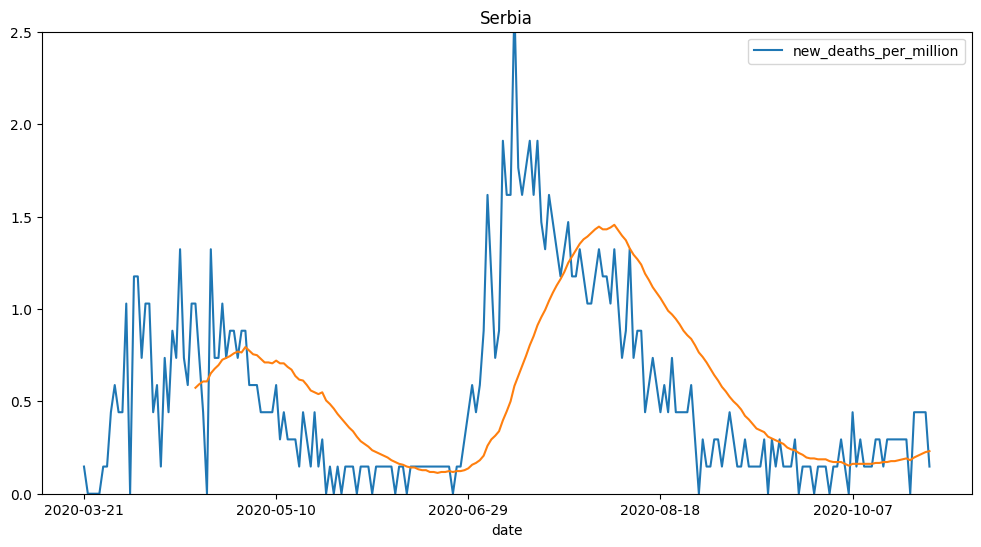

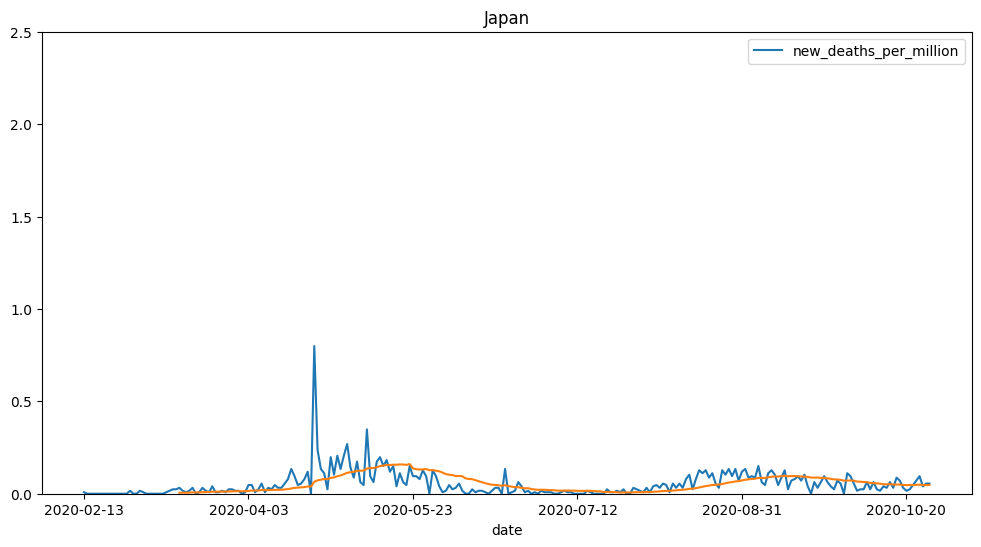

In [46]:
# Country with lowest median age
plot_covid_data('Serbia', 'new_deaths_per_million', True, 2.5)
# Country with highest median age
plot_covid_data('Japan', 'new_deaths_per_million', True, 2.5)

How Does Obesity Effect Death Rate?

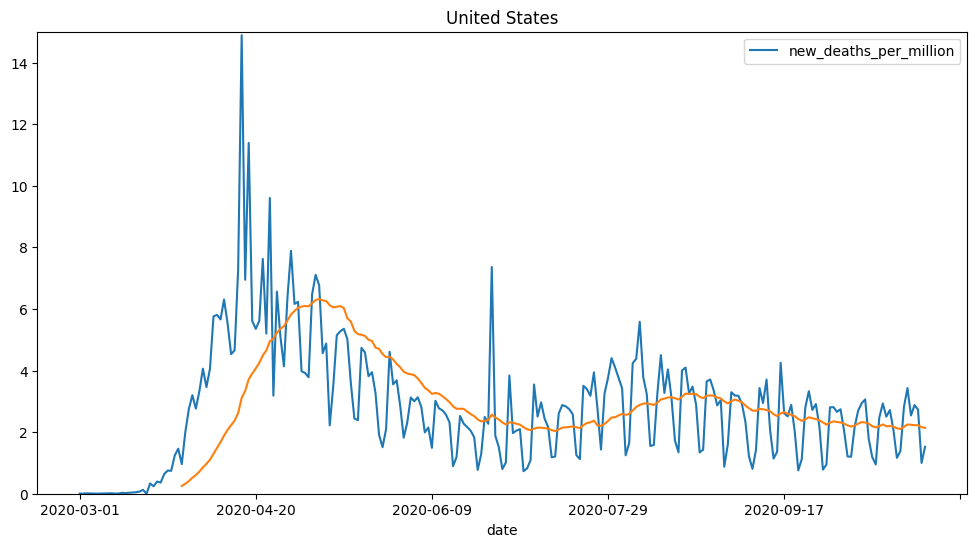

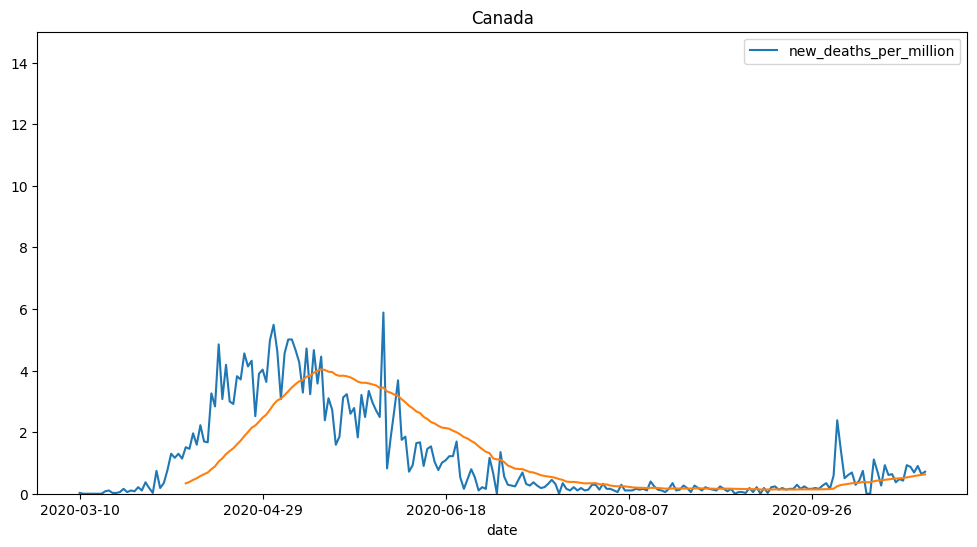

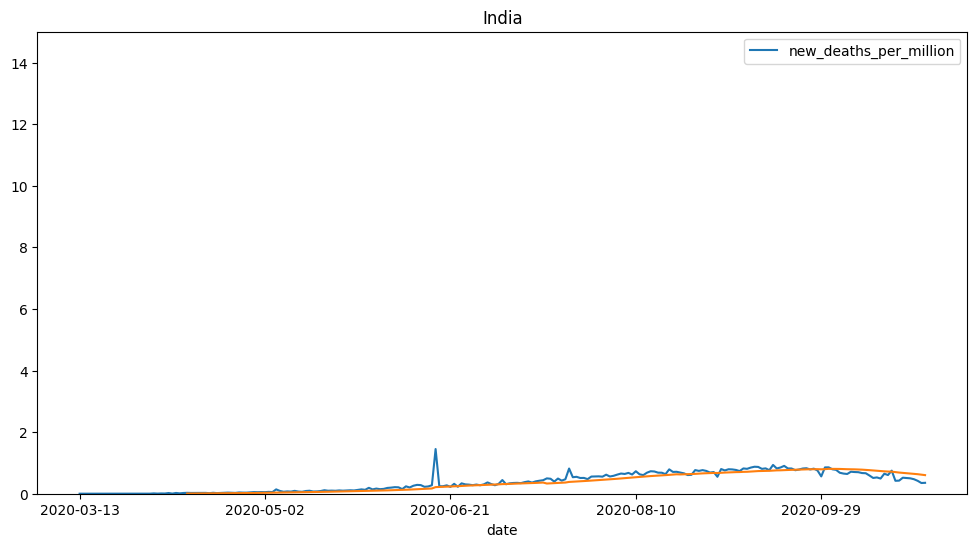

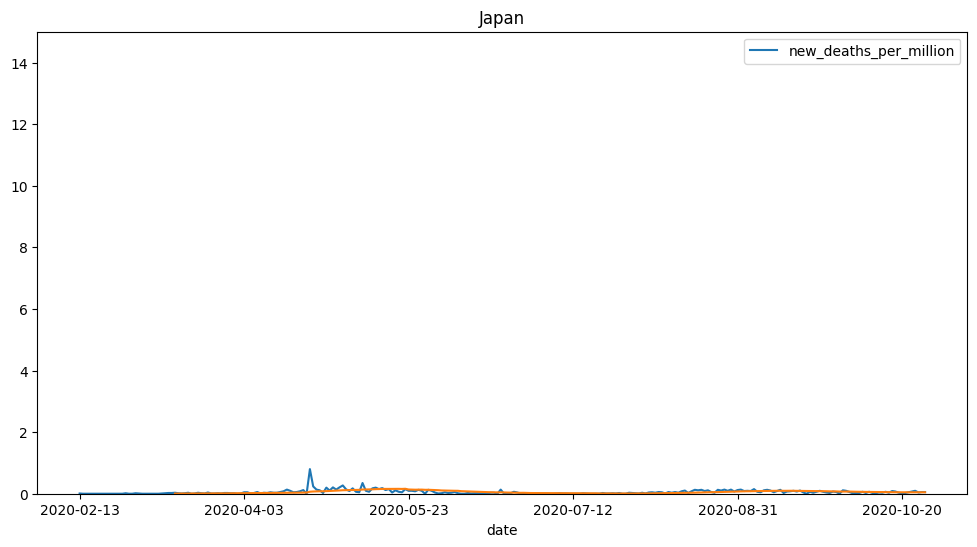

In [47]:
# Countries with highest percentages 
plot_covid_data('United States', 'new_deaths_per_million', True, 15)
plot_covid_data('Canada', 'new_deaths_per_million', True, 15)
# 2 countries with lowest percentages
plot_covid_data('India', 'new_deaths_per_million', True, 15)
plot_covid_data('Japan', 'new_deaths_per_million', True, 15)

How Does Diabetes Prevalence Effect Death?

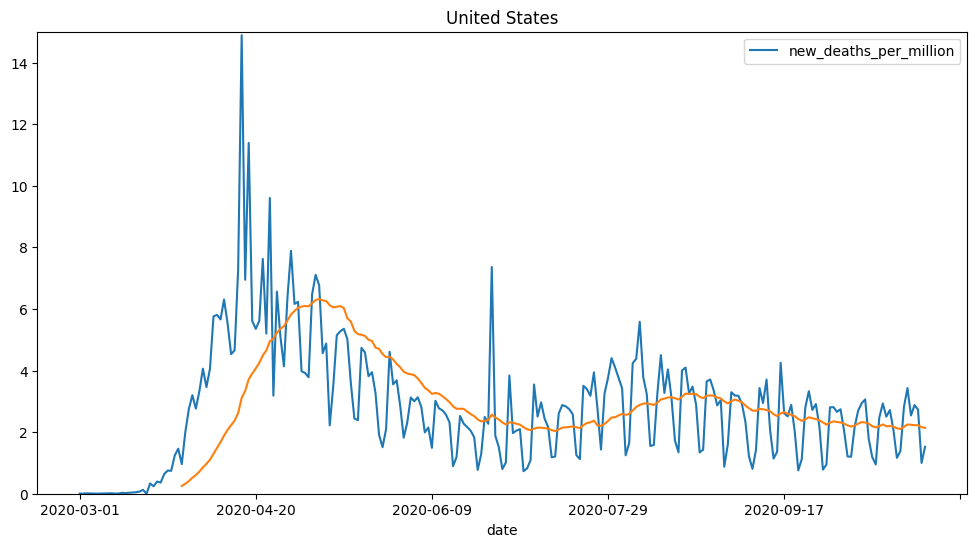

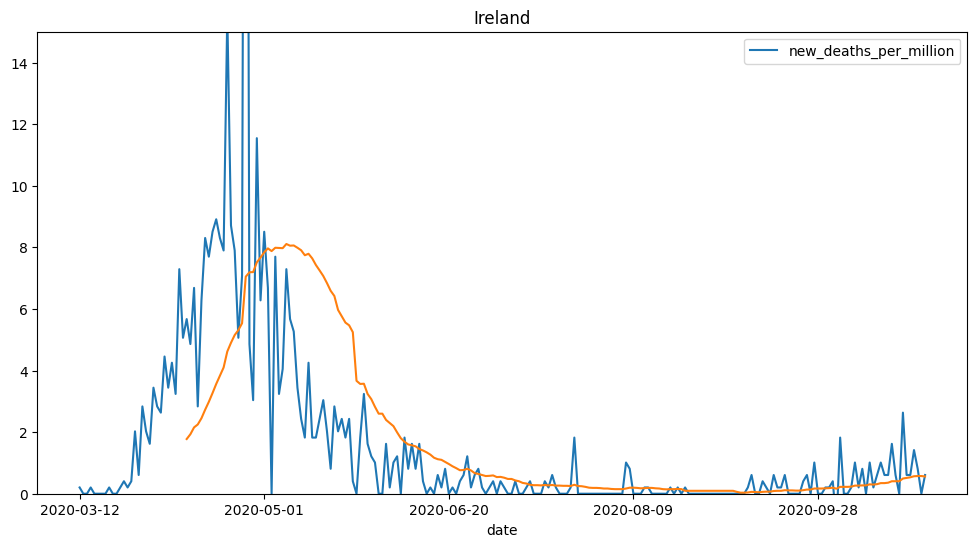

In [48]:
# Country with highest percentage 
plot_covid_data('United States', 'new_deaths_per_million', True, 15)
# Country with lowest percentage
plot_covid_data('Ireland', 'new_deaths_per_million', True, 15)

Does More Testing Slow Deathrate?

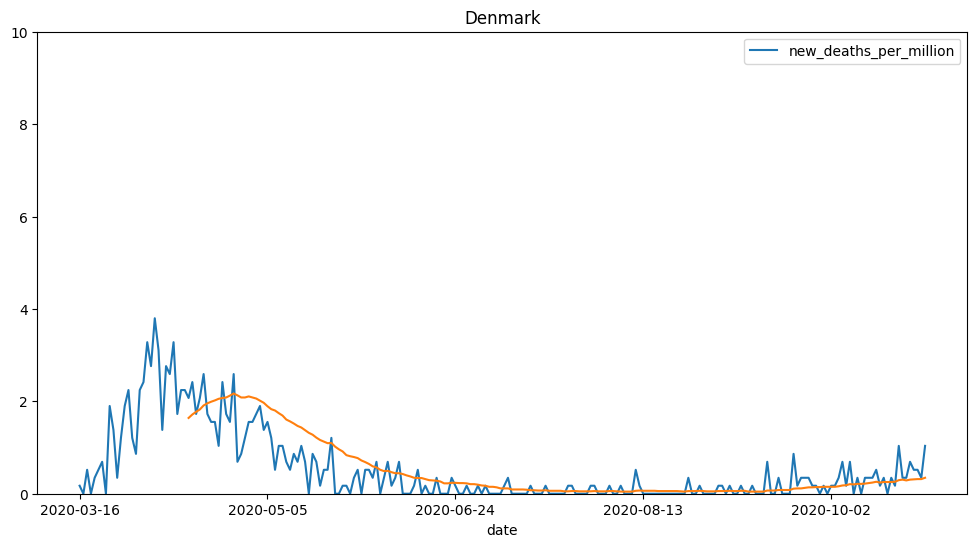

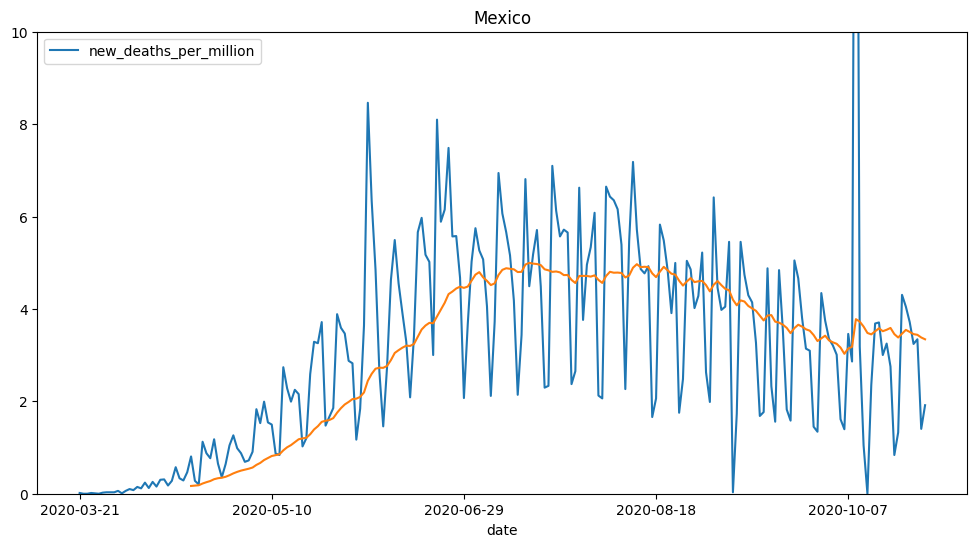

In [49]:
# Country with highest percentage 
plot_covid_data('Denmark', 'new_deaths_per_million', True, 10)
# Country with lowest percentage
plot_covid_data('Mexico', 'new_deaths_per_million', True, 10)

In [55]:
def scatter_plot(date, col1, col2):
    # Select rows that match the date parameter for every country
    tot_df = owid_df[owid_df['date'] == date][['date', 'location', col1, col2]]
    tot_df.set_index('date', inplace=True)
    
    # Create Plotly scatter plot
    fig = px.scatter(data_frame=tot_df, x=col2, 
                     y=col1, color="location", trendline="ols",
                 hover_data=['location'])
    fig.show()
    
    return tot_df

scatter_plot('2020-10-27', 'total_deaths_per_million', 'aged_70_older')

,location,total_deaths_per_million,aged_70_older
date,,,
2020-10-27,Aruba,337.186,7.452
2020-10-27,Afghanistan,39.097,1.337
2020-10-27,Angola,8.154,1.362
2020-10-27,Anguilla,NaN,NaN
2020-10-27,Albania,166.794,8.643
...,...,...,...
2020-10-27,South Africa,320.493,3.053
2020-10-27,Zambia,18.930,1.542
2020-10-27,Zimbabwe,16.282,1.882
